<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html hw5.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

# Homework 7 (Due 28 Mar)
**Due 28 Mar (midnight)**

Total points: 100

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-v0_8-colorblind')

### Exercise 1 (10pt) Where does the energy go?

The damped harmonic oscillator is described by the equation of motion is:

$$m\ddot{x} + b\dot{x} + kx = 0$$

where $m$ is the mass, $b$ is the damping coefficient, and $k$ is the spring constant.

The damping term ($F_{damp} = - b\dot{x}$) models the dissipative forces acting on the oscillator. The total energy for the oscillator is given by the sum of the kinetic and potential energies,

$$E = \frac{1}{2}m\dot{x}^2 + \frac{1}{2}kx^2.$$

* 1a (3pt). What is the energy per unit time dissipated by the damping force?
* 1b (4pt). Take the time derivative of the total energy and show that it is equal (in magnitude) to the energy dissipated by the damping force.
* 1c (3pt). What is the sign relationship between the energy dissipated by the damping force and the time derivative of the total energy?

### Exercise 2 (10pt), Unpacking the critically damped solution

The solution for critical damping ($\beta = \omega_0$) is given by,

$$x(t) = x_1(t) + x_2(t) = Ae^{-\beta t} + Bte^{-\beta t},$$

where $A$ and $B$ are constants. Notice the second solution $x_2(t) = Bte^{-\omega_0t}$ has an additional linear term $t$. We glossed over this solution in class, but it is important to understand why this term is present because it tells us about solving differential equations with pathologically difficult-to-see solutions.

Start with the under damped solutions, 

$$y_1(t) = e^{-\beta t}\cos(\omega_1 t) \quad \text{and} \quad y_2(t) = e^{-\beta t}\sin(\omega_1 t),$$

where we have used the notation $\omega_1 = \sqrt{\omega_0^2 - \beta^2}$.

* 2a (3pt). Show that you can recover the first solution $x_1(t)$ by taking the limit of $\beta \rightarrow \omega_0$ of $y_1(t)$.
* 2b (3pt). Show that you cannot recover the second solution $x_2(t)$ by taking the limit of $\beta \rightarrow \omega_0$ of $y_2(t)$ directly. What do you get?
* 2c (4pt). If $\beta \neq \omega_0$, you can divide $y_2(t)$ by $\omega_1$. Now show that in the limit $\beta \rightarrow \omega_0$ of $y_2(t)/\omega_1$, we recover the form of $x_2(t)$.

### Exercise 3 (20pt), Exploring the damped harmonic oscillator

You can choose to solve this exercise using analytical, or graphical methods. Should you decide to use numerical methods, you should make sure to use a method that conserves energy. However, this exercise does not need to be solved numerically as closed form solutions exist.

The solution to the simple harmonic oscillator is given by,

$$x(t) = A_{sho}\cos(\omega_0 t) + B_{sho}\sin(\omega_0 t),$$

where $A_{sho}$ and $B_{sho}$ are determined by the initial conditions. The solution to the underdamped harmonic oscillator is given by,


$$x(t) = e^{-\beta t}\left(A\cos(\omega_1 t) + B\sin(\omega_1 t)\right),$$

where $A$ and $B$ are also determined by the initial conditions.

#### Scenario 1

An undamped oscillator has a period $T_0 = 1.000\mathrm{s}$, but then the damping is turned on. We observe the period increases by 0.001 seconds. 

* 3a (3pt). What is the damping coefficient $\beta$?
* 3b (3pt). By how much does the amplitude of the oscillation decrease after 10 periods?
* 3c (3pt). What would be able to notice more easily, the change in period or the change in amplitude?

#### Scenario 2

An undamped oscillator has a period $T_0 = 1.000\mathrm{s}$. With weak damping, the amplitude drops by 50% in one period $T_1$. Recall the period of the damped oscillator is given by $T_1 = 2\pi/\omega_1$.

* 3d (3pt). What is the damping coefficient $\beta$?
* 3e (3pt). What is the period of the damped oscillator?
* 3f (3pt). By how much does the amplitude of the oscillation decrease after 10 periods?

* 3g (2pt). What would be able to notice more easily, the change in period or the change in amplitude?


### Exercise 4 (40pt), The Damped Driven Oscillator

The damped driven oscillator is described by the equation of motion,

$$m\ddot{x} + b\dot{x} + kx = F(t),$$

where $F_0$ is the amplitude of the driving force and $\omega$ is the frequency of the driving force. We reduced this equation by dividing by $m$ to get the equation of motion in terms of the damping coefficient $\beta = b/2m$ and the natural frequency $\omega_0 = \sqrt{k/m}$. In the equation below, $f(t) = F_0/m$.

$$\ddot{x} + 2\beta\dot{x} + \omega_0^2x = f(t).$$

We solve this equation for sinusoidal driving forces, $f(t) = f_0\cos(\omega t)$ and demonstrated the resonance effect. In this exercise, we will numerically solve the equation of motion. This will allow us to explore the behavior of the damped driven oscillator for different periodic driving forces, not just sinusoidal ones.

* 4a (10pt). Modify the code (or write your own) include a driving force $f(t) = f_0\cos(\omega t)$. 
    * To start, **choose $f_0$=1, $\omega_0$=10 and $\beta$=0.1.** 
    * Check that your code produces a steady state solution for the driven harmonic oscillator. Roughly, what is the steady state amplitude, $A(t \rightarrow \infty)$, of the driven oscillator?
* 4b (10pt). For different choices of the driving frequency $\omega$, observe the behavior of the driven oscillator. Describe the behavior of the driven oscillator for $\omega \ll \omega_0$, $\omega \approx \omega_0$, and $\omega \gg \omega_0$.
* 4c (20 pt). Sweep the driving frequency $\omega$ at a fixed amplitude and store the amplitude of the steady-state solution. Plot the amplitude of the steady-state solution as a function of the driving frequency $\omega$. Describe the behavior of the amplitude as a function of the driving frequency.

We have written a numerical solver for the damped undriven oscillator; it's similar to the prior codes we've used. Your task is to modify the code to include a driving force. We have used the second order Runge-Kutta method to solve the equation of motion. You can use the code as a starting point for the damped driven oscillator. Notice we also call the code in the next cell.

In [9]:
def ddho(y, t, omega_0, beta):
    """
    Function to compute derivatives based on the damped driven oscillator model.
    Notice the driving force is included but zero.
    """
    x, v = y
    dxdt = v
    dvdt = -2 * beta * v - omega_0**2 * x
    return np.array([dxdt, dvdt])


def rk2_step(y, t, dt, omega_0, beta, F0=1.0, omega=10, phase=0.0):
    """
    Performs a single step of the Runge-Kutta 2nd order (midpoint) method.

    Parameters:
    - y: current state [position, velocity].
    - t: current time.
    - dt: time step size.
    - omega_0: natural frequency of the oscillator.
    - beta: damping coefficient.
    - F0: amplitude of the driving force.
    - omega: frequency of the driving force.
    - phase: phase of the driving force.

    Returns:
    - y_next: state at time step dt [position, velocity].
    """
    k1 = ddho(y, t, omega_0, beta)
    k2 = ddho(y + 0.5 * k1 * dt, t + 0.5 * dt, omega_0, beta)
    y_next = y + k2 * dt
    
    return y_next

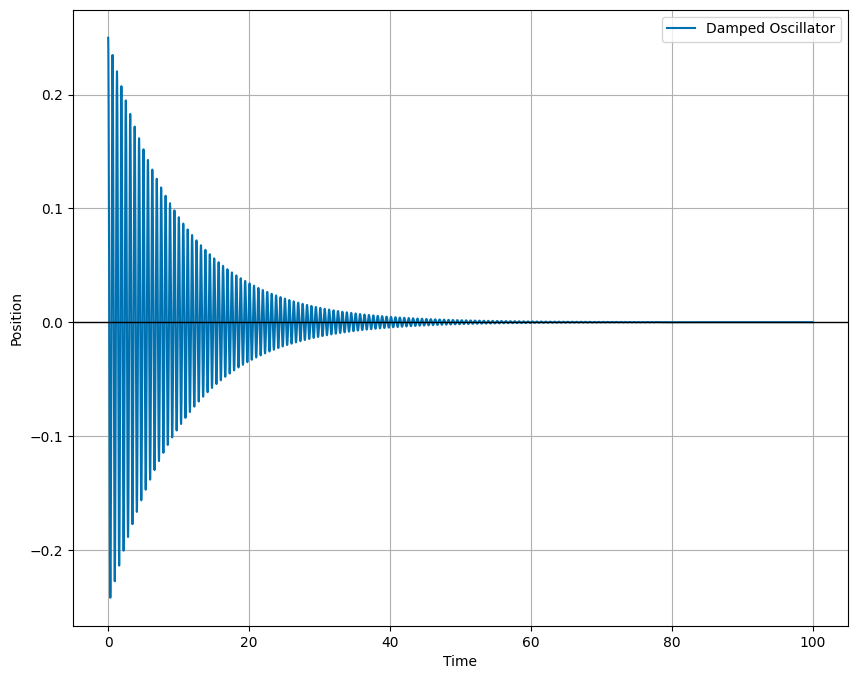

In [10]:
# Simulation parameters
T = 100.0  # total time
dt = 0.01  # time step
omega_0 = 10  # natural frequency
beta = 0.1  # damping coefficient

steps = int(T / dt)
t = np.linspace(0, T, steps)
y = np.zeros((steps, 2))  # Array to hold position and velocity

## Initial conditions
y[0] = [0.25, 0.0]  # x=1, v=0

for i in range(steps - 1):
    y[i + 1] = rk2_step(y[i], t[i], dt, omega_0, beta)

oscillator = pd.DataFrame(y, columns=["Position", "Velocity"])
oscillator["Time"] = t

# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(oscillator["Time"], oscillator["Position"], label="Damped Oscillator")
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Time")
plt.ylabel("Position")
plt.grid(True)
plt.legend()

### Exercise 5 (20pt), Project Check-in 1

This is the first of three check-ins for your final project. Last week, you submitted a project proposal with milestones. This week, you will submit a progress report. This is common in science and engineering research. Funding agencies require an annual report to ensure the project is on track. While we are not funding you, we want this work to be a similar experience to a research project.

The first annual report is often a minimal progress report. How much can you say? You have only just started! 

But, you can say what you have done, what you are planning to do, what you have learned so far, and what changes you have to make. This is the purpose of this exercise.

* 5a (5 pts). Review your project proposal. What have you been able to accomplish so far? What were you unable to do in the time you had? Be honest in your evaluation of your progress. You will not be penalized for not reaching your milestones. What does that mean you need to prioritize in the coming weeks? (at least 250 words)
* 5b (5 pts). What problems did you encounter in doing you research? What questions came up and how did you resolve them? Are there any unresolved questions? (at least 250 words)
* 5c (5 pts). Provide an artifact from your project. This could be a plot, a code snippet, a data set, or a figure. Explain what this artifact is and how it fits into your project. (at least 100-200 words)
* 5d (5 pts). Update your project timeline and milestones. How will you adjust your timeline to account for the work you have done and the work you have left to do? (at least 100-200 words)

### Extra Credit - Integrating Classwork With Research

This opportunity will allow you to earn up to 5 extra credit points on a Homework per week. These points can push you above 100% or help make up for missed exercises.
In order to earn all points you must:

1. Attend an MSU research talk (recommended research oriented Clubs is  provided below)

2. Summarize the talk using at least 150 words

3. Turn in the summary along with your Homework.

Approved talks:
Talks given by researchers through the following clubs:
* Research and Idea Sharing Enterprise (RAISE)​: Meets Wednesday Nights Society for Physics Students (SPS)​: Meets Monday Nights

* Astronomy Club​: Meets Monday Nights

* Facility For Rare Isotope Beam (FRIB) Seminars: ​Occur multiple times a week